In [32]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

### Feature forklaring
- User Type: 
    - Customer = 24-hour pass or 3-day pass
    - Subscriber = Annual Member
- Gender:
    - 0 -> Unknown
    - 1 -> Male
    - 2 -> Female

In [5]:
f=pd.read_csv(r"Trips_2018.csv")

In [6]:
f.describe()

Unnamed: 0  tripduration  start_station_id  start_station_latitude  \
count  1.754834e+07  1.754834e+07      1.754584e+07            1.754834e+07   
mean   8.774169e+06  9.887432e+02      1.589282e+03            4.073737e+01   
std    5.065769e+06  1.889584e+04      1.439432e+03            3.225813e-02   
min    0.000000e+00  6.100000e+01      7.200000e+01            4.064654e+01   
25%    4.387084e+06  3.580000e+02      3.800000e+02            4.071755e+01   
50%    8.774169e+06  6.050000e+02      5.050000e+02            4.073818e+01   
75%    1.316125e+07  1.060000e+03      3.249000e+03            4.075763e+01   
max    1.754834e+07  1.951005e+07      3.721000e+03            4.550636e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             1.754834e+07    1.754584e+07          1.754834e+07   
mean             -7.398260e+01    1.580830e+03          4.073704e+01   
std               1.912753e-02    1.438502e+03          3.206583e-02   
min              -7.402535e+01    7.200000e+01          4.064654e+01   
25%              -7.399521e+01    3.800000e+02          4.071755e+01   
50%              -7.398565e+01    5.050000e+02          4.073756e+01   
75%              -7.397283e+01    3.249000e+03          4.075725e+01   
max              -7.356891e+01    3.721000e+03          4.550636e+01   

       end_station_longitude        bikeid    birth_year        gender  
count           1.754834e+07  1.754834e+07  1.754834e+07  1.754834e+07  
mean           -7.398281e+01  2.656141e+04  1.978993e+03  1.148613e+00  
std             1.919611e-02  6.222916e+03  1.192922e+01  5.438043e-01  
min            -7.408364e+01  1.452900e+04  1.885000e+03  0.000000e+00  
25%            -7.399595e+01  2.029300e+04  1.969000e+03  1.000000e+00  
50%            -7.398602e+01  2.827000e+04  1.981000e+03  1.000000e+00  
75%            -7.397344e+01  3.185200e+04  1.989000e+03  1.000000e+00  
max            -7.356891e+01  3.583100e+04  2.002000e+03  2.000000e+00

In [7]:
f = f.rename({"Unnamed: 0": "Trip ID"}, axis="columns")
f = f.set_index("Trip ID")

In [8]:
f.head()

tripduration                 starttime                  stoptime  \
Trip ID                                                                     
0                 970  2018-01-01 13:50:57.4340  2018-01-01 14:07:08.1860   
1                 723  2018-01-01 15:33:30.1820  2018-01-01 15:45:33.3410   
2                 496  2018-01-01 15:39:18.3370  2018-01-01 15:47:35.1720   
3                 306  2018-01-01 15:40:13.3720  2018-01-01 15:45:20.1910   
4                 306  2018-01-01 18:14:51.5680  2018-01-01 18:19:57.6420   

         start_station_id  start_station_latitude  start_station_longitude  \
Trip ID                                                                      
0                    72.0               40.767272               -73.993929   
1                    72.0               40.767272               -73.993929   
2                    72.0               40.767272               -73.993929   
3                    72.0               40.767272               -73.993929   
4                    72.0               40.767272               -73.993929   

         end_station_id  end_station_latitude  end_station_longitude  bikeid  \
Trip ID                                                                        
0                 505.0             40.749013             -73.988484   31956   
1                3255.0             40.750585             -73.994685   32536   
2                 525.0             40.755942             -74.002116   16069   
3                 447.0             40.763707             -73.985162   31781   
4                3356.0             40.774667             -73.984706   30319   

           usertype  birth_year  gender  
Trip ID                                  
0        Subscriber        1992       1  
1        Subscriber        1969       1  
2        Subscriber        1956       1  
3        Subscriber        1974       1  
4        Subscriber        1992       1

In [ ]:
f['starttime'] = pd.to_datetime(f['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
f['stoptime'] = pd.to_datetime(f['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')
f['weekday']= f['starttime'].dt.weekday
f['is_weekend']=[is_weekend(el) for el in f['weekday']]
# sm_dummies=pd.get_dummies(f, columns=['usertype'])
# sm_dummies.head()

tripduration               starttime                stoptime  \
Trip ID                                                                 
0                 970 2018-01-01 13:50:57.434 2018-01-01 14:07:08.186   
1                 723 2018-01-01 15:33:30.182 2018-01-01 15:45:33.341   
2                 496 2018-01-01 15:39:18.337 2018-01-01 15:47:35.172   
3                 306 2018-01-01 15:40:13.372 2018-01-01 15:45:20.191   
4                 306 2018-01-01 18:14:51.568 2018-01-01 18:19:57.642   

         start_station_id  start_station_latitude  start_station_longitude  \
Trip ID                                                                      
0                    72.0               40.767272               -73.993929   
1                    72.0               40.767272               -73.993929   
2                    72.0               40.767272               -73.993929   
3                    72.0               40.767272               -73.993929   
4                    72.0               40.767272               -73.993929   

         end_station_id  end_station_latitude  end_station_longitude  bikeid  \
Trip ID                                                                        
0                 505.0             40.749013             -73.988484   31956   
1                3255.0             40.750585             -73.994685   32536   
2                 525.0             40.755942             -74.002116   16069   
3                 447.0             40.763707             -73.985162   31781   
4                3356.0             40.774667             -73.984706   30319   

         birth_year  gender  weekday  is_weekend  usertype_Customer  \
Trip ID                                                               
0              1992       1        0       False              False   
1              1969       1        0       False              False   
2              1956       1        0       False              False   
3              1974       1        0       False              False   
4              1992       1        0       False              False   

         usertype_Subscriber  
Trip ID                       
0                       True  
1                       True  
2                       True  
3                       True  
4                       True

In [10]:
f.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
dtype: object

In [ ]:
# sm_dummies.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
usertype_Customer                    bool
usertype_Subscriber                  bool
dtype: object

# Looking at coordinates

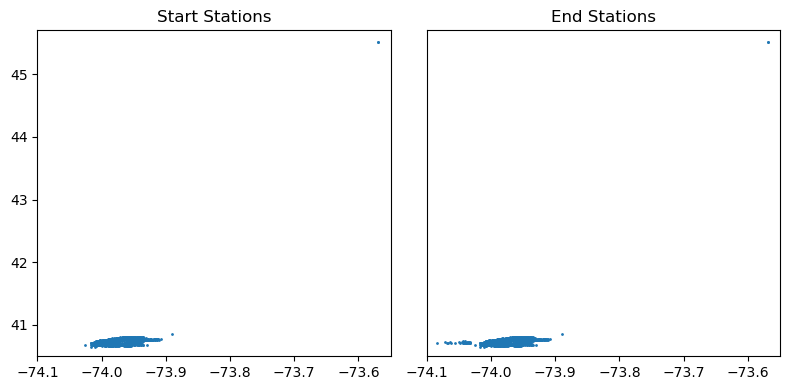

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

xlim, ylim = (-74.1, -73.55), (40.5, 45.7)
dot_size = 1

start_station_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
start_station_df = start_station_df.set_index("start_station_id")
start_station_df = start_station_df.rename(
    {
        "start_station_latitude": "latitude", 
        "start_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax1.scatter(start_station_df['longitude'],start_station_df['latitude'],s=dot_size)
ax1.set_title("Start Stations")
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)

end_station_df = f.drop_duplicates(subset='end_station_id')[['end_station_id', 'end_station_latitude', 'end_station_longitude']]
end_station_df = end_station_df.set_index("end_station_id")
end_station_df = end_station_df.rename(
    {
        "end_station_latitude": "latitude", 
        "end_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax2.scatter(end_station_df['longitude'],end_station_df['latitude'],s=dot_size)
ax2.set_title("End Stations")
ax2.set_xlim(*xlim)
ax2.set_ylim(*ylim)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

# Remove outlier

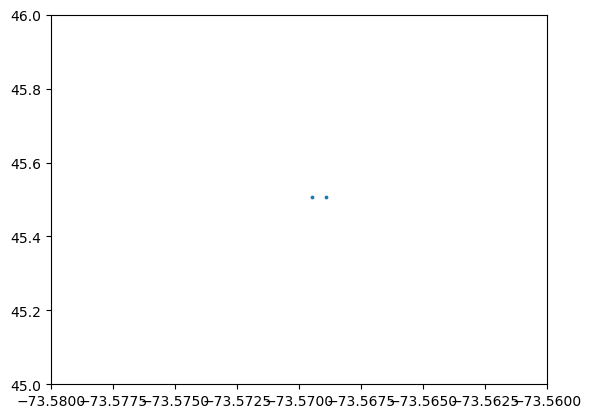

In [13]:
plt.scatter(start_station_df['longitude'], start_station_df['latitude'], s=3)
plt.xlim((-73.58, -73.56))
plt.ylim((45, 46))
plt.show()

In [14]:
start_station_df[start_station_df.longitude > -73.6]

latitude  longitude
start_station_id                      
3488.0            45.506364 -73.569463
3650.0            45.506264 -73.568906

In [15]:
end_station_df[end_station_df.longitude > -73.6]

latitude  longitude
end_station_id                      
3488.0          45.506364 -73.569463
3650.0          45.506264 -73.568906

In [16]:
f[
    (f.start_station_id == 3488.0) &
    (f.start_station_id != f.end_station_id)
]

Empty DataFrame
Columns: [tripduration, starttime, stoptime, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bikeid, usertype, birth_year, gender, weekday, is_weekend]
Index: []

In [17]:
f[
    (f.end_station_id == 3488.0) &
    (f.start_station_id != f.end_station_id)
]

tripduration               starttime                stoptime  \
Trip ID                                                                 
8772457       1634200 2018-07-18 18:27:51.511 2018-08-06 16:24:32.388   

         start_station_id  start_station_latitude  start_station_longitude  \
Trip ID                                                                      
8772457            3036.0               40.662908               -73.999722   

         end_station_id  end_station_latitude  end_station_longitude  bikeid  \
Trip ID                                                                        
8772457          3488.0             45.506364             -73.569463   24354   

           usertype  birth_year  gender  weekday  is_weekend  
Trip ID                                                       
8772457  Subscriber        1988       1        2       False

In [18]:
f[
    (f.start_station_id == 3650.0) &
    (f.start_station_id != f.end_station_id)
]

Empty DataFrame
Columns: [tripduration, starttime, stoptime, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bikeid, usertype, birth_year, gender, weekday, is_weekend]
Index: []

In [19]:
f[
    (f.end_station_id == 3650.0) &
    (f.start_station_id != f.end_station_id)
]

Empty DataFrame
Columns: [tripduration, starttime, stoptime, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bikeid, usertype, birth_year, gender, weekday, is_weekend]
Index: []

In [20]:
f[
    (f.start_station_id == 3488) | (f.end_station_id == 3488) |
    (f.start_station_id == 3650) | (f.end_station_id == 3650)
].describe()

tripduration                      starttime  \
count  8.200000e+01                             82   
mean   2.954804e+04  2018-03-14 21:46:53.854036736   
min    6.200000e+01     2018-01-08 16:03:59.375000   
25%    2.235000e+02  2018-01-26 10:59:14.185999872   
50%    9.390000e+02  2018-02-20 14:11:07.361499904   
75%    2.653500e+03  2018-05-08 17:10:19.270750208   
max    1.634200e+06     2018-07-18 18:27:51.511000   
std    1.827257e+05                            NaN   

                            stoptime  start_station_id  \
count                             82         82.000000   
mean   2018-03-15 05:59:22.416878080       3636.585366   
min       2018-01-08 16:09:41.338000       3036.000000   
25%    2018-01-26 12:46:01.522750208       3650.000000   
50%       2018-02-20 14:12:41.880000       3650.000000   
75%    2018-05-08 17:19:55.421250048       3650.000000   
max       2018-08-06 16:24:32.388000       3650.000000   
std                              NaN         73.784128   

       start_station_latitude  start_station_longitude  end_station_id  \
count               82.000000                82.000000       82.000000   
mean                45.447203               -73.574180     3642.097561   
min                 40.662908               -73.999722     3488.000000   
25%                 45.506264               -73.568906     3650.000000   
50%                 45.506264               -73.568906     3650.000000   
75%                 45.506264               -73.568906     3650.000000   
max                 45.506364               -73.568906     3650.000000   
std                  0.534860                 0.047574       35.110974   

       end_station_latitude  end_station_longitude        bikeid   birth_year  \
count             82.000000              82.000000     82.000000    82.000000   
mean              45.506269             -73.568933  23651.158537  1985.792683   
min               45.506264             -73.569463  17667.000000  1969.000000   
25%               45.506264             -73.568906  21928.000000  1986.000000   
50%               45.506264             -73.568906  24354.000000  1986.000000   
75%               45.506264             -73.568906  24354.000000  1986.000000   
max               45.506364             -73.568906  24354.000000  1988.000000   
std                0.000022               0.000121   1256.116408     2.752049   

          gender    weekday  
count  82.000000  82.000000  
mean    1.012195   1.378049  
min     0.000000   0.000000  
25%     1.000000   0.000000  
50%     1.000000   1.000000  
75%     1.000000   3.000000  
max     2.000000   4.000000  
std     0.248149   1.329998

We have two outliers stations with id 3448 and 3650. We found that they are both placed right next to one another in Montreal, Canada. From the above cells, it is apparent that all but one trips completed with start or end point in Montreal (station 3488 and 3650) are trips in Montreal only.

There is a single trip from Brooklyn (station 3036) to Montreal (station 3488). It's duration is 18.9 days and out of 17 million trips completed, this one is the only one travelling to Montreal. Therefore we classify stations in Montreal as not relevant and outliers.

In [21]:
f = f.drop(
    f[
        (f.start_station_id == 3488) | (f.end_station_id == 3488) |
        (f.start_station_id == 3650) | (f.end_station_id == 3650)
    ].index
)

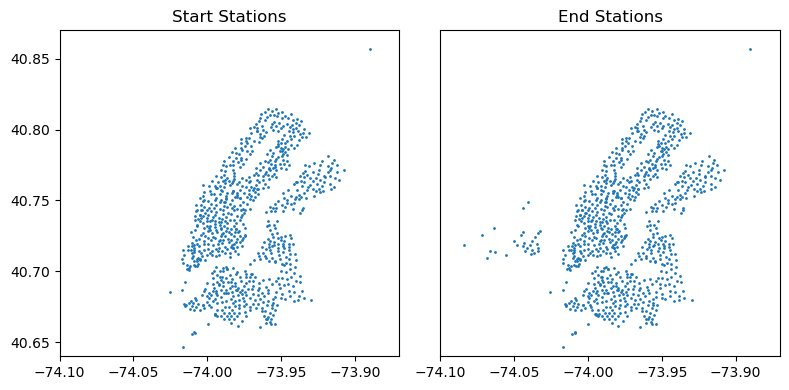

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

xlim, ylim = (-74.1, -73.87), (40.64, 40.87)
dot_size = 1

start_station_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
start_station_df = start_station_df.set_index("start_station_id")
start_station_df = start_station_df.rename(
    {
        "start_station_latitude": "latitude", 
        "start_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax1.scatter(start_station_df['longitude'],start_station_df['latitude'],s=dot_size)
ax1.set_title("Start Stations")
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)

end_station_df = f.drop_duplicates(subset='end_station_id')[['end_station_id', 'end_station_latitude', 'end_station_longitude']]
end_station_df = end_station_df.set_index("end_station_id")
end_station_df = end_station_df.rename(
    {
        "end_station_latitude": "latitude", 
        "end_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax2.scatter(end_station_df['longitude'],end_station_df['latitude'],s=dot_size)
ax2.set_title("End Stations")
ax2.set_xlim(*xlim)
ax2.set_ylim(*ylim)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

### Classifying the stations with ID: NaN

We find that a great deal of stations have ID = NaN. So we try and plot them to find their location.

In [23]:
start_ids = np.unique(f.start_station_id)
end_ids = np.unique(f.end_station_id)
print(f"Number of NaN values in start_station_id: {f.start_station_id.isna().sum()}")
print(f"Number of NaN values in end_station_id: {f.end_station_id.isna().sum()}")
start_station_df[start_station_df.index.isna()]

Number of NaN values in start_station_id: 2497
Number of NaN values in end_station_id: 2497


latitude  longitude
start_station_id                     
NaN                 40.857     -73.89

2497 trips have a station ID with NaN-value

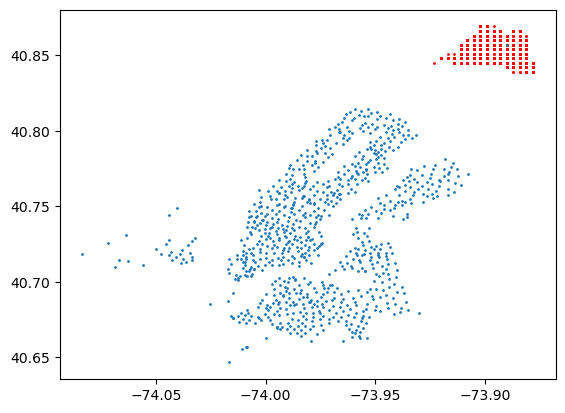

In [24]:
f_nan = f[f.start_station_id.isna()][['start_station_longitude', 'start_station_latitude']]
plt.scatter(f_nan.start_station_longitude, f_nan.start_station_latitude, s=1, c='r', label="NaN-station")
plt.scatter(end_station_df['longitude'], end_station_df['latitude'], s=1)
plt.show()

In [25]:
print("\nCheck: Are the placements different? If all 0, then all placements same")
print(np.unique(f[f.start_station_id.isna()].start_station_longitude) - np.unique(f[f.start_station_id.isna()].end_station_longitude))
print(np.unique(f[f.end_station_id.isna()].start_station_longitude) - np.unique(f[f.end_station_id.isna()].end_station_longitude))
print(np.unique(f[f.start_station_id.isna()].start_station_latitude) - np.unique(f[f.start_station_id.isna()].end_station_latitude))
print(np.unique(f[f.end_station_id.isna()].start_station_latitude) - np.unique(f[f.end_station_id.isna()].end_station_latitude))

print("\nValues for longitude and latitude")
print(np.unique(f[f.start_station_id.isna()].start_station_longitude))
print(np.unique(f[f.start_station_id.isna()].start_station_latitude))

print(f"\nNumber of stations with NaN-value as ID: {len(np.unique(f[f.start_station_id.isna()].start_station_longitude))}")


Check: Are the placements different? If all 0, then all placements same
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Values for longitude and latitude
[-73.923 -73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899
 -73.896 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878]
[40.839 40.842 40.845 40.848 40.851 40.854 40.857 40.86  40.863 40.866
 40.869]

Number of stations with NaN-value as ID: 16


Okay, all 16 NaN-ID-stations are located in a single 'cluster' or grouping.
Looking at the placement in a map, the red grouping lies in the Bronx area North of New York. Also as a result of our plotting the single blue dot is the result of dropping duplicates on the ID's. This means that it, in previous plots, represented all the red dots, we now found.

We check whether or not we have data on any trips leaving this grouping. 

In [26]:
f[(f.start_station_id.isna()) & (f.end_station_id.notna())]

Empty DataFrame
Columns: [tripduration, starttime, stoptime, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bikeid, usertype, birth_year, gender, weekday, is_weekend]
Index: []

In [27]:
f[(f.start_station_id.notna()) & (f.end_station_id.isna())]

Empty DataFrame
Columns: [tripduration, starttime, stoptime, start_station_id, start_station_latitude, start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bikeid, usertype, birth_year, gender, weekday, is_weekend]
Index: []

Okay, no trips from a NaN-ID-station leaves the grouping in the Bronx area. Hence, they have no implication on clusters in the central New York area. Since that is the case they wont be important for rebalancing the bike locations, so we classicy them as outliers

In [28]:
f = f.dropna()

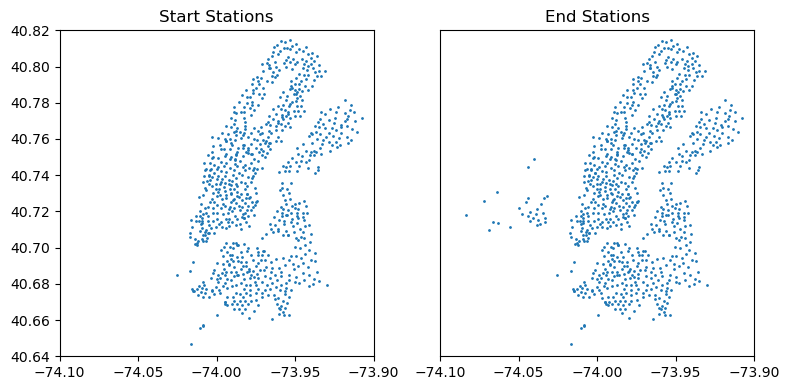

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

xlim, ylim = (-74.1, -73.9), (40.64, 40.82)
dot_size = 1

start_station_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
start_station_df = start_station_df.set_index("start_station_id")
start_station_df = start_station_df.rename(
    {
        "start_station_latitude": "latitude", 
        "start_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax1.scatter(start_station_df['longitude'],start_station_df['latitude'],s=dot_size)
ax1.set_title("Start Stations")
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)

end_station_df = f.drop_duplicates(subset='end_station_id')[['end_station_id', 'end_station_latitude', 'end_station_longitude']]
end_station_df = end_station_df.set_index("end_station_id")
end_station_df = end_station_df.rename(
    {
        "end_station_latitude": "latitude", 
        "end_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax2.scatter(end_station_df['longitude'],end_station_df['latitude'],s=dot_size)
ax2.set_title("End Stations")
ax2.set_xlim(*xlim)
ax2.set_ylim(*ylim)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

## K-means

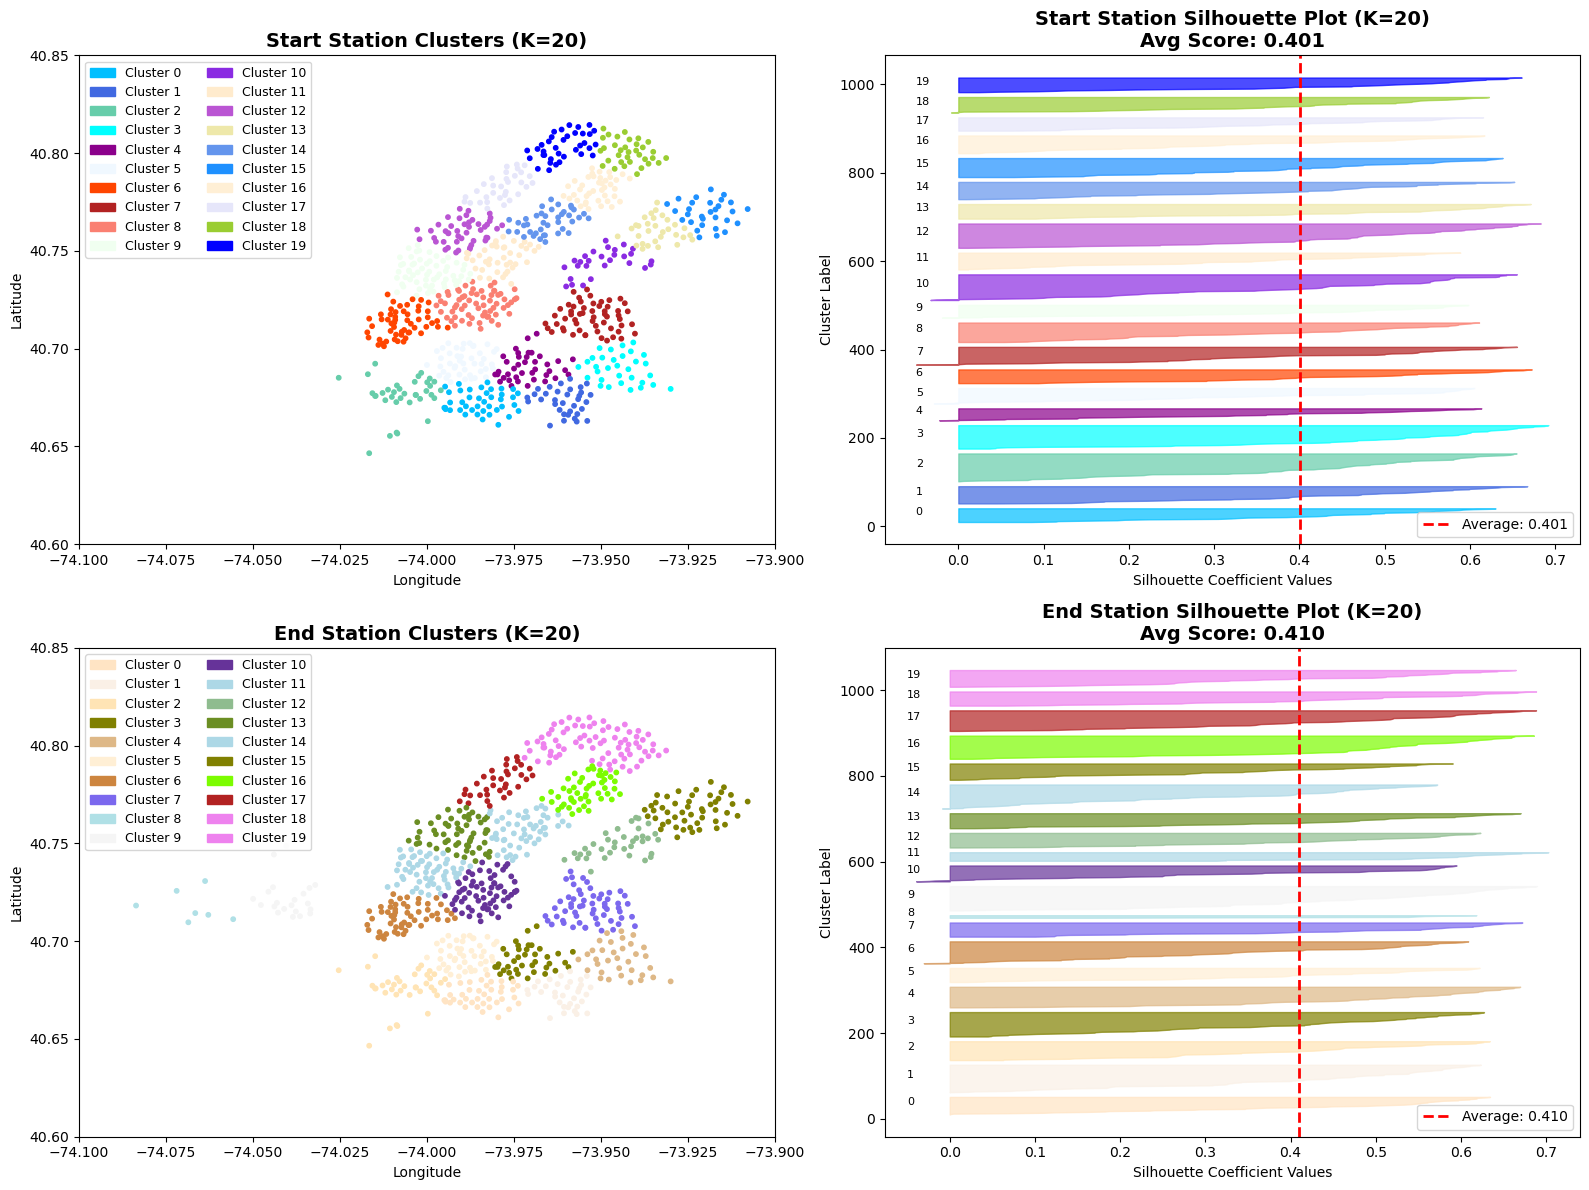

Start Station Average Silhouette Score: 0.401
End Station Average Silhouette Score: 0.410


In [59]:
from sklearn.cluster import KMeans
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import random

K=20

# Fit K-means for start stations
k_start=KMeans(K, random_state=42, n_init=30)
k_start.fit(start_station_df)
centroids_start = k_start.cluster_centers_

order = np.argsort(centroids_start[:, 0])
mapping = {old: new for new, old in enumerate(order)}
fix_labels_start = np.array([mapping[label] for label in k_start.labels_])

dt_clusters_start=start_station_df.copy()
dt_clusters_start['cluster']= fix_labels_start
# Fit K-means for end stations
k_end=KMeans(K)
k_end.fit(end_station_df)
centroids_end = k_end.cluster_centers_

order = np.argsort(centroids_end[:, 0])
mapping = {old: new for new, old in enumerate(order)}
fix_labels_end = np.array([mapping[label] for label in k_end.labels_])
dt_clusters_end=end_station_df.copy()
dt_clusters_end['cluster']=fix_labels_end

# Generate colors
num_colors=K
colors=list(mcolors.CSS4_COLORS.keys())
cluster_colors_start = random.choices(colors,k=K)
cluster_colors_end = random.choices(colors,k=K)

# Prepare data for start stations
x_points_start=dt_clusters_start["longitude"]
y_points_start=dt_clusters_start["latitude"]
labels_start = dt_clusters_start["cluster"]
x_start=[]
y_start=[]
c_start=[]
for label, x, y in zip(labels_start, x_points_start, y_points_start):
    if label == -1:
        continue
    x_start.append(x)
    y_start.append(y)
    c_start.append(cluster_colors_start[label])

# Prepare data for end stations
x_points_end=dt_clusters_end["longitude"]
y_points_end=dt_clusters_end["latitude"]
labels_end = dt_clusters_end["cluster"]
x_end=[]
y_end=[]
c_end=[]
for label, x, y in zip(labels_end, x_points_end, y_points_end):
    if label==-1:
        continue
    x_end.append(x)
    y_end.append(y)
    c_end.append(cluster_colors_end[label])

# Calculate silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg_start = silhouette_score(start_station_df, k_start.labels_)
sample_silhouette_values_start = silhouette_samples(start_station_df, k_start.labels_)

silhouette_avg_end = silhouette_score(end_station_df, k_end.labels_)
sample_silhouette_values_end = silhouette_samples(end_station_df, k_end.labels_)

# Create combined plot with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Start Station Clusters
ax1 = axes[0, 0]
ax1.scatter(x_start, y_start, s=10, c=c_start)
ax1.set_xlim(-74.1, -73.9)
ax1.set_ylim(40.6, 40.85)
ax1.set_title(f'Start Station Clusters (K={K})', fontsize=14, fontweight='bold')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
legend_patches_start = [Patch(color=cluster_colors_start[i], label=f"Cluster {i}") for i in range(K)]
ax1.legend(handles=legend_patches_start, loc='upper left', fontsize=9, ncol=2)

# Plot 2: Start Station Silhouette Plot
ax2 = axes[0, 1]
y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values_start[k_start.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cluster_colors_start[i]
    ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=8)
    y_lower = y_upper + 10
ax2.set_title(f"Start Station Silhouette Plot (K={K})\nAvg Score: {silhouette_avg_start:.3f}", 
              fontsize=14, fontweight='bold')
ax2.set_xlabel("Silhouette Coefficient Values")
ax2.set_ylabel("Cluster Label")
ax2.axvline(x=silhouette_avg_start, color="red", linestyle="--", linewidth=2, 
            label=f"Average: {silhouette_avg_start:.3f}")
ax2.legend()

# Plot 3: End Station Clusters
ax3 = axes[1, 0]
ax3.scatter(x_end, y_end, s=10, c=c_end)
ax3.set_xlim(-74.1, -73.9)
ax3.set_ylim(40.6, 40.85)
ax3.set_title(f'End Station Clusters (K={K})', fontsize=14, fontweight='bold')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
legend_patches_end = [Patch(color=cluster_colors_end[i], label=f"Cluster {i}") for i in range(K)]
ax3.legend(handles=legend_patches_end, loc='upper left', fontsize=9, ncol=2)

# Plot 4: End Station Silhouette Plot
ax4 = axes[1, 1]
y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values_end[k_end.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cluster_colors_end[i]
    ax4.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax4.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=8)
    y_lower = y_upper + 10
ax4.set_title(f"End Station Silhouette Plot (K={K})\nAvg Score: {silhouette_avg_end:.3f}", 
              fontsize=14, fontweight='bold')
ax4.set_xlabel("Silhouette Coefficient Values")
ax4.set_ylabel("Cluster Label")
ax4.axvline(x=silhouette_avg_end, color="red", linestyle="--", linewidth=2, 
            label=f"Average: {silhouette_avg_end:.3f}")
ax4.legend()

plt.tight_layout()
plt.show()

print(f"Start Station Average Silhouette Score: {silhouette_avg_start:.3f}")
print(f"End Station Average Silhouette Score: {silhouette_avg_end:.3f}")

In [62]:
# Write fix_labels_end to a text file
with open('fix_labels_end.txt', 'w') as file:
    for label in fix_labels_end:
        file.write(f"{label}\n")

print(f"fix_labels_end written to 'fix_labels_end.txt' with {len(fix_labels_end)} labels")

fix_labels_end written to 'fix_labels_end.txt' with 848 labels


In [ ]:
# Merge cluster assignments to the original dataframe
f_cluster_merge = f.merge(dt_clusters_end['cluster'], left_on='end_station_id', right_index=True, how='left')

f_cluster_merge.head()

tripduration               starttime                stoptime  \
Trip ID                                                                 
0                 970 2018-01-01 13:50:57.434 2018-01-01 14:07:08.186   
1                 723 2018-01-01 15:33:30.182 2018-01-01 15:45:33.341   
2                 496 2018-01-01 15:39:18.337 2018-01-01 15:47:35.172   
3                 306 2018-01-01 15:40:13.372 2018-01-01 15:45:20.191   
4                 306 2018-01-01 18:14:51.568 2018-01-01 18:19:57.642   

         start_station_id  start_station_latitude  start_station_longitude  \
Trip ID                                                                      
0                    72.0               40.767272               -73.993929   
1                    72.0               40.767272               -73.993929   
2                    72.0               40.767272               -73.993929   
3                    72.0               40.767272               -73.993929   
4                    72.0               40.767272               -73.993929   

         end_station_id  end_station_latitude  end_station_longitude  bikeid  \
Trip ID                                                                        
0                 505.0             40.749013             -73.988484   31956   
1                3255.0             40.750585             -73.994685   32536   
2                 525.0             40.755942             -74.002116   16069   
3                 447.0             40.763707             -73.985162   31781   
4                3356.0             40.774667             -73.984706   30319   

           usertype  birth_year  gender  weekday  is_weekend  cluster  
Trip ID                                                                
0        Subscriber        1992       1        0       False        6  
1        Subscriber        1969       1        0       False        3  
2        Subscriber        1956       1        0       False        3  
3        Subscriber        1974       1        0       False        6  
4        Subscriber        1992       1        0       False       12

In [32]:
dt_clusters_end.head()

latitude  longitude  cluster
end_station_id                               
505.0           40.749013 -73.988484       16
3255.0          40.750585 -73.994685       19
525.0           40.755942 -74.002116       19
447.0           40.763707 -73.985162        4
3356.0          40.774667 -73.984706       10

# Connect clusters with the 17 mio data frame

In [33]:
df_merged_start = f.merge(
    dt_clusters_end[['cluster']], 
    left_on='start_station_id', 
    right_index=True, 
    how='left'
)
# df_merged_start = df_merged_start.drop(columns=['Unnamed: 0'])

df_merged_end = f.merge(
    dt_clusters_end[['cluster']], 
    left_on='end_station_id', 
    right_index=True, 
    how='left'
)

In [37]:
np.unique(dt_clusters_end[dt_clusters_end.cluster == 12].index)

array([ 344.,  354.,  372.,  373.,  409.,  437., 3041., 3042., 3043.,
       3044., 3046., 3047., 3048., 3050., 3052., 3053., 3054., 3055.,
       3056., 3057., 3058., 3059., 3060., 3061., 3062., 3063., 3064.,
       3065., 3066., 3067., 3068., 3069., 3070., 3179., 3241., 3249.])

In [45]:
cluster_12_departures = df_merged_start[df_merged_start["cluster"]==12]

In [43]:
cluster_12_arrivals = df_merged_end[df_merged_end['cluster'] == 12]

In [46]:
cluster_12_departures.size

3749024

# Investigating a cluster

In [ ]:
cluster_12 = df_merged_start[df_merged_start["cluster"]==12]

In [ ]:
cluster_12 = cluster_12.copy()
cluster_12.head()

tripduration               starttime                stoptime  \
560672            79 2018-01-11 10:12:58.979 2018-01-11 10:14:18.703   
560673           185 2018-01-11 10:15:48.486 2018-01-11 10:18:54.284   
560674           136 2018-01-11 10:21:20.566 2018-01-11 10:23:37.389   
560675           129 2018-01-11 10:24:03.587 2018-01-11 10:26:13.073   
560676           275 2018-01-11 10:26:55.663 2018-01-11 10:31:30.869   

        start_station_id  start_station_latitude  start_station_longitude  \
560672            3239.0               40.646538               -74.016588   
560673            3239.0               40.646538               -74.016588   
560674            3239.0               40.646538               -74.016588   
560675            3239.0               40.646538               -74.016588   
560676            3239.0               40.646538               -74.016588   

        end_station_id  end_station_latitude  end_station_longitude  bikeid  \
560672          3239.0             40.646538             -74.016588   22368   
560673          3239.0             40.646538             -74.016588   22368   
560674          3239.0             40.646538             -74.016588   22368   
560675          3239.0             40.646538             -74.016588   22368   
560676          3239.0             40.646538             -74.016588   22368   

          usertype  birth_year  gender  weekday  is_weekend  cluster  
560672  Subscriber        1993       1        3       False       12  
560673  Subscriber        1993       1        3       False       12  
560674  Subscriber        1993       1        3       False       12  
560675  Subscriber        1993       1        3       False       12  
560676  Subscriber        1993       1        3       False       12

# Data visualization for a cluster

In [ ]:


# Make sure starttime is a datetime
cluster_12['starttime'] = pd.to_datetime(cluster_12['starttime'])

# Extract date and hour
cluster_12['date'] = cluster_12['starttime'].dt.date
cluster_12['hour'] = cluster_12['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster_12.groupby(['date', 'hour']).size().reset_index(name='num_trips')
trips_per_hour


date  hour  num_trips
0     2018-01-01     1          6
1     2018-01-01     4          2
2     2018-01-01     6          3
3     2018-01-01     7          2
4     2018-01-01     8          4
...          ...   ...        ...
8107  2018-12-31    18          6
8108  2018-12-31    19          2
8109  2018-12-31    20          5
8110  2018-12-31    21          3
8111  2018-12-31    22          1

[8112 rows x 3 columns]

In [ ]:

trips_per_hour['datetime'] = pd.to_datetime(trips_per_hour['date'].astype(str)) + pd.to_timedelta(trips_per_hour['hour'], unit='h')
trips_per_hour.set_index('datetime', inplace=True)
trips_per_hour.drop(columns=['date'], inplace=True)
trips_per_hour.head()



hour  num_trips
datetime                            
2018-01-01 01:00:00     1          6
2018-01-01 04:00:00     4          2
2018-01-01 06:00:00     6          3
2018-01-01 07:00:00     7          2
2018-01-01 08:00:00     8          4

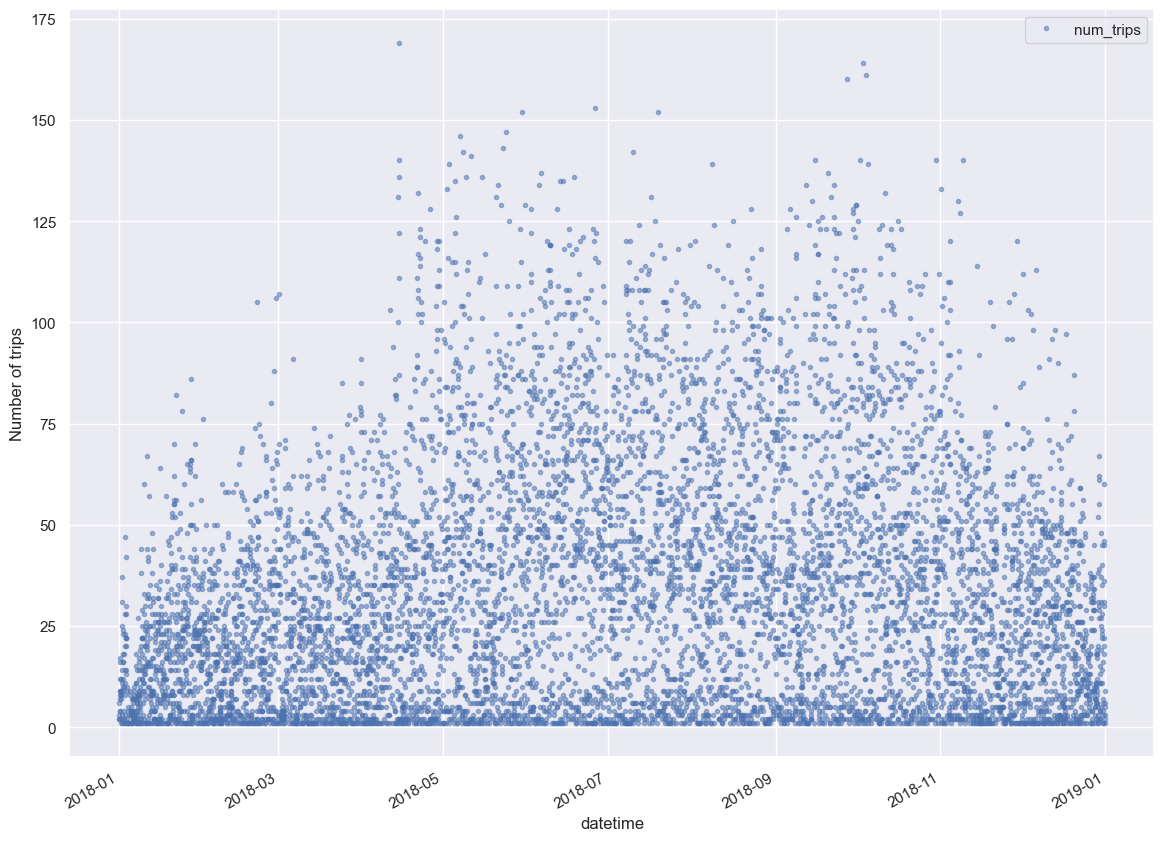

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

Text(0, 0.5, 'number of trips')

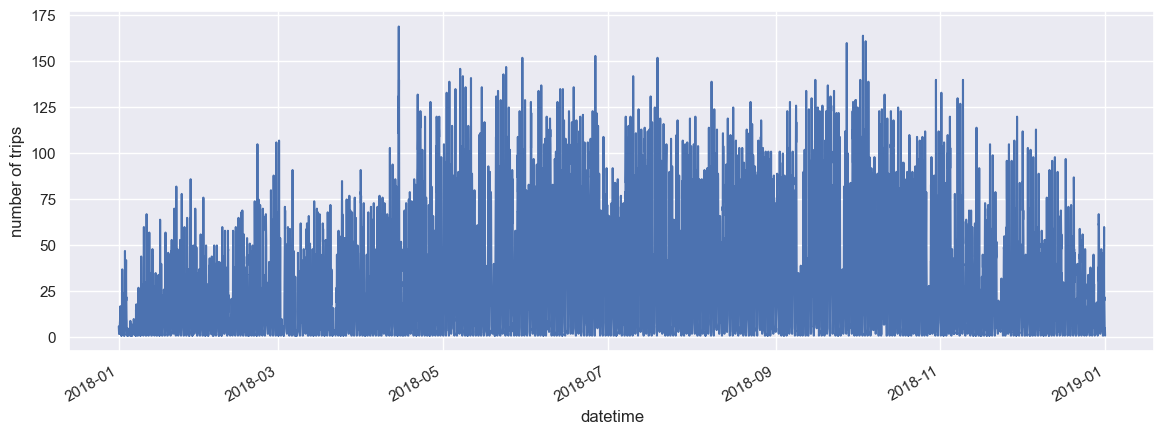

In [ ]:
ax = trips_per_hour.loc['2018', 'num_trips'].plot()
ax.set_ylabel('number of trips')

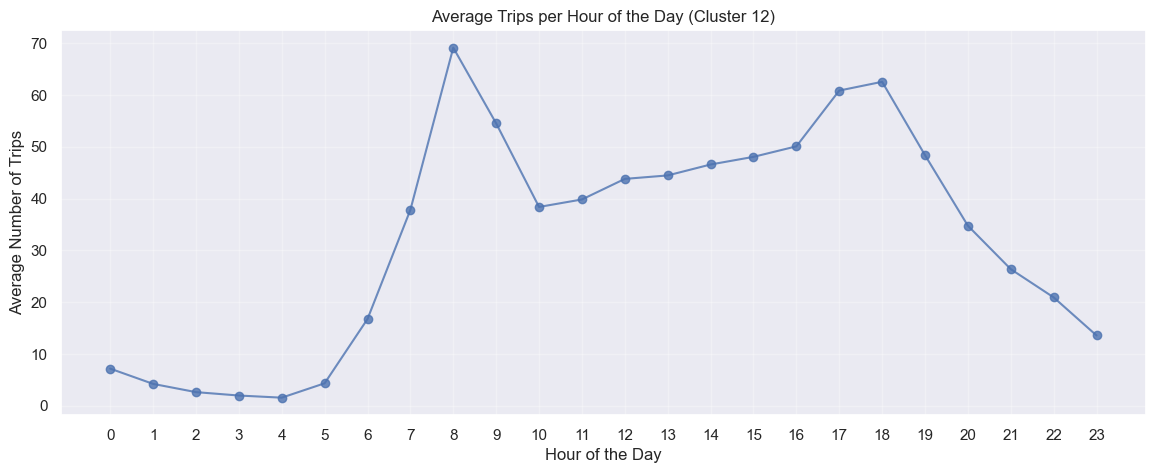

In [ ]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour = trips_per_hour.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()


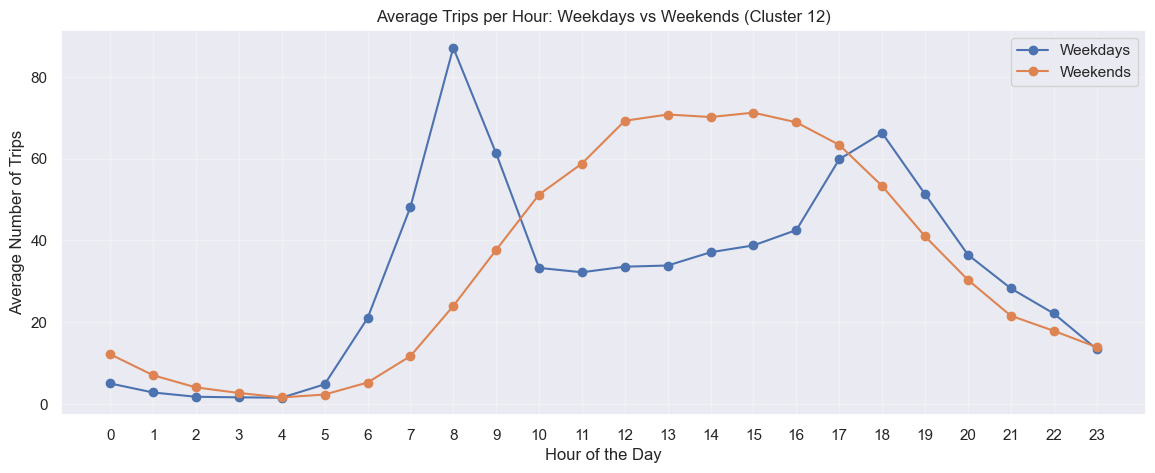

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour from datetime index if not already present
trips_per_hour['hour'] = trips_per_hour.index.hour
trips_per_hour['is_weekend'] = trips_per_hour.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour[~trips_per_hour['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour[trips_per_hour['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends (Cluster 12)')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()


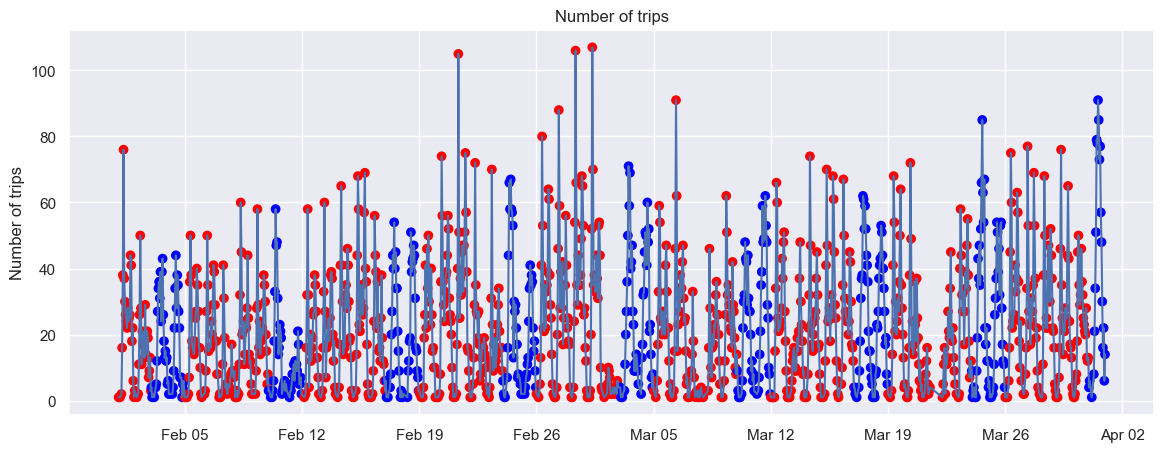

In [ ]:
import matplotlib.dates as mdates
weekends=trips_per_hour.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour.loc['2018-02':'2018-03'].index, trips_per_hour.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# Investigating all the data

In [ ]:


# Make sure starttime is a datetime
df_merged_start['starttime'] = pd.to_datetime(df_merged_start['starttime'])

# Extract date and hour
df_merged_start['date'] = df_merged_start['starttime'].dt.date
df_merged_start['hour'] = df_merged_start['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour_all = df_merged_start.groupby(['date', 'hour']).size().reset_index(name='num_trips')

trips_per_hour_all['datetime'] = pd.to_datetime(trips_per_hour_all['date'].astype(str)) + pd.to_timedelta(trips_per_hour_all['hour'], unit='h')
trips_per_hour_all.set_index('datetime', inplace=True)
trips_per_hour_all.drop(columns=['date'], inplace=True)

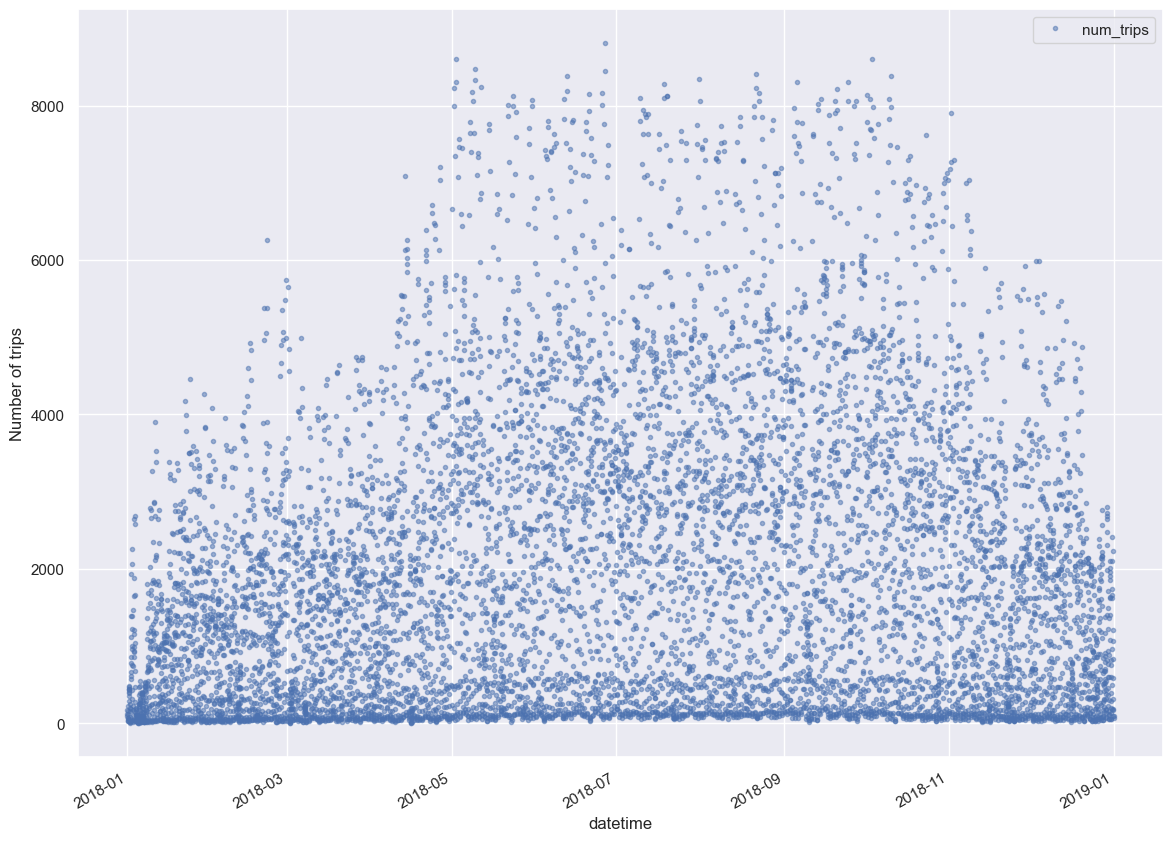

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour_all[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

Text(0, 0.5, 'number of trips')

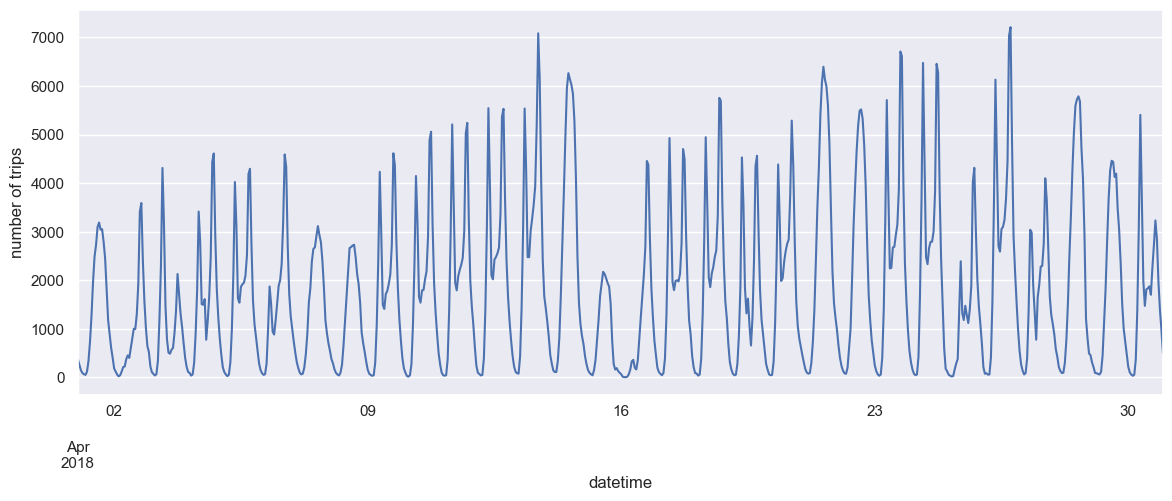

In [ ]:
ax = trips_per_hour_all.loc['2018-04', 'num_trips'].plot()
ax.set_ylabel('number of trips')

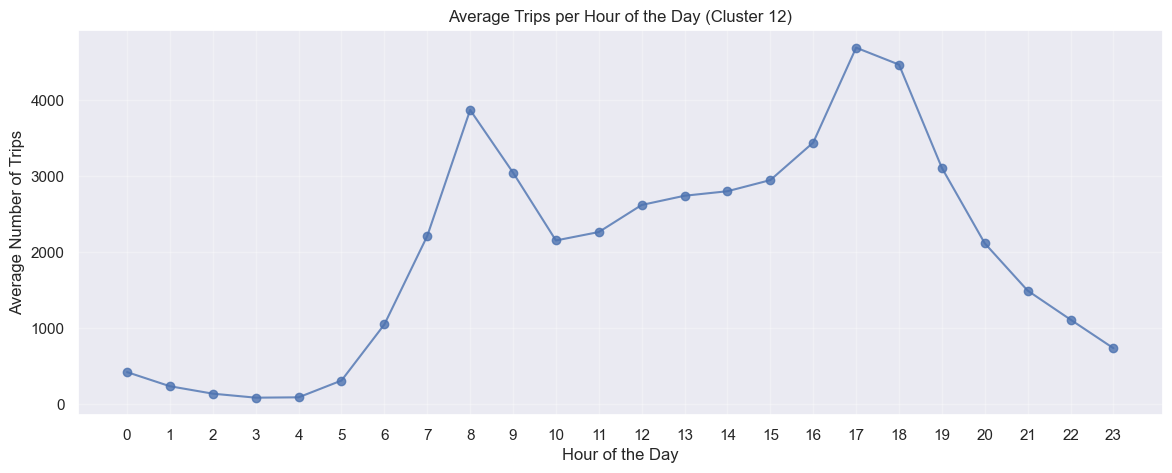

In [ ]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour_all = trips_per_hour_all.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour_all.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()

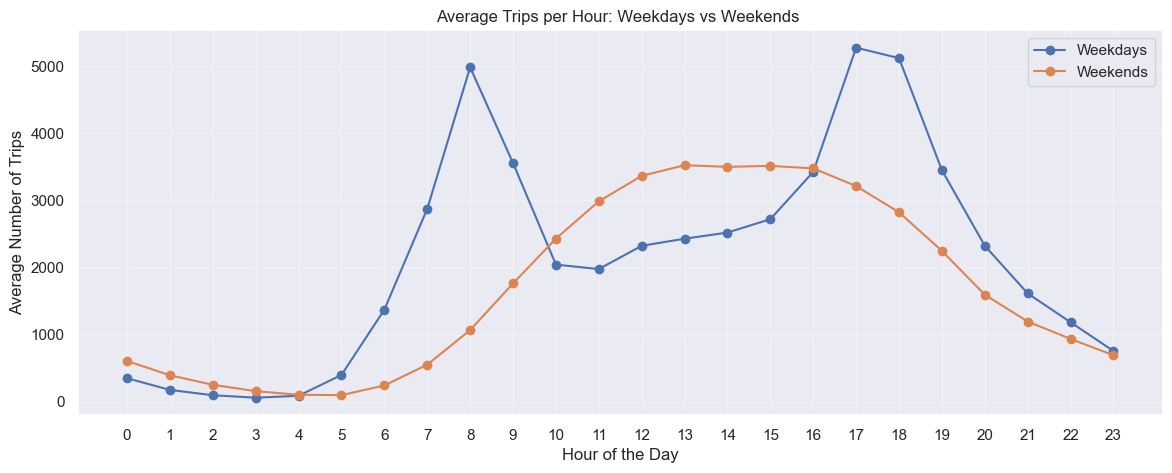

In [ ]:

# Extract hour from datetime index if not already present
trips_per_hour_all['hour'] = trips_per_hour_all.index.hour
trips_per_hour_all['is_weekend'] = trips_per_hour_all.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour_all[~trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour_all[trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends ')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

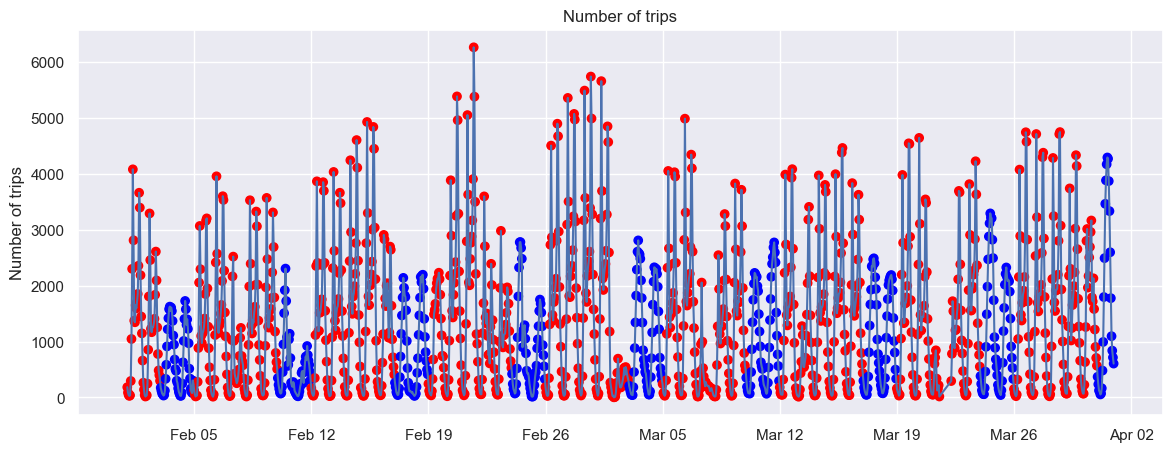

In [ ]:
weekends=trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour_all.loc['2018-02':'2018-03'].index, trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


# Exploring seasonality in all the data

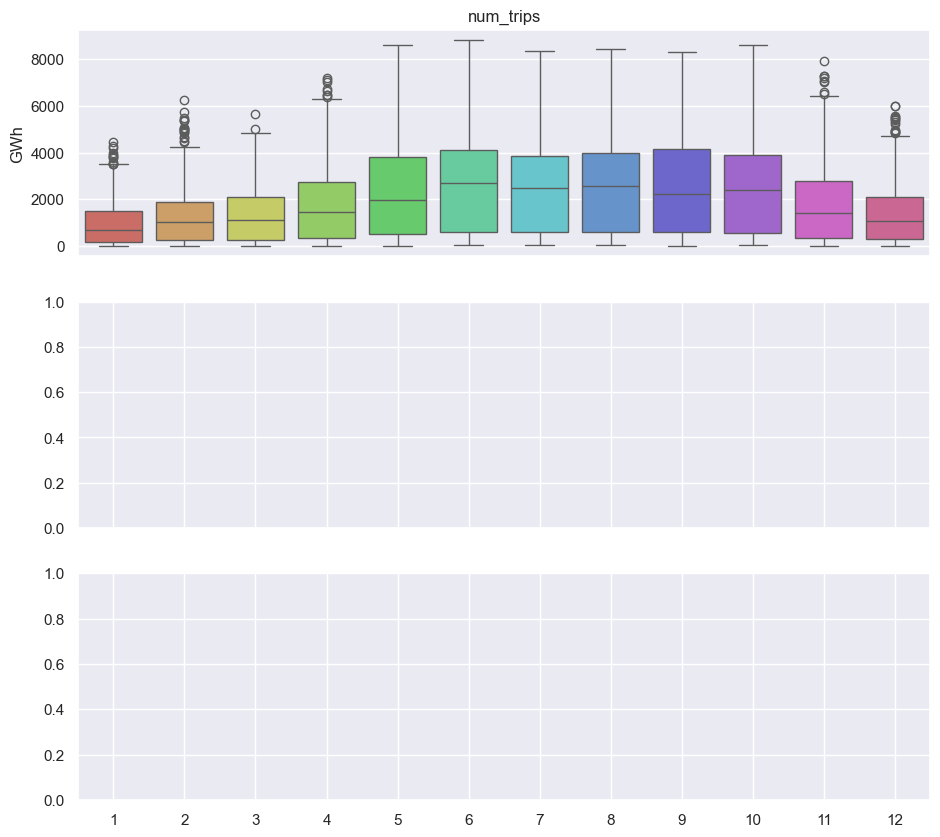

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
trips_per_hour_all['Month'] = trips_per_hour_all.index.month
for name, ax in zip(['num_trips'], axes):
    sns.boxplot(data=trips_per_hour_all, x='Month', y=name, ax=ax, hue='Month',palette=sns.color_palette("hls", 12),legend=False)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

<AxesSubplot:xlabel='hour', ylabel='num_trips'>

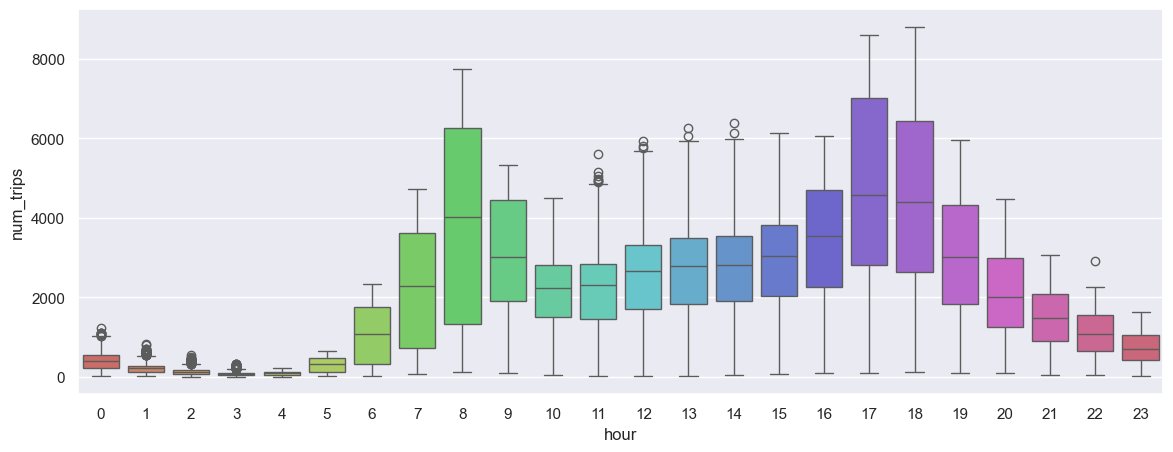

In [ ]:
sns.boxplot(data=trips_per_hour_all, x='hour', y='num_trips',hue='hour',palette=sns.color_palette("hls", 24),legend=False)

# Rolling average

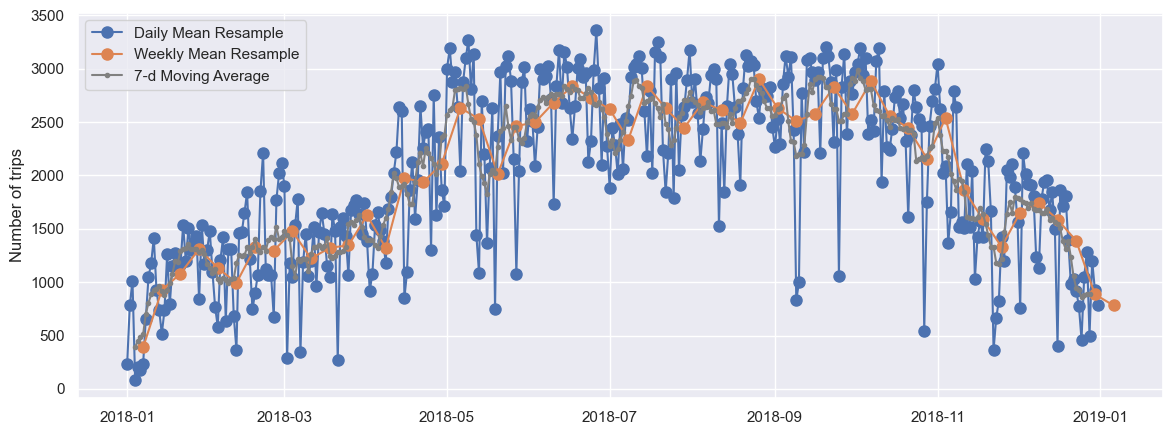

In [ ]:
data_columns = ['num_trips']
opsd_daily_mean = trips_per_hour_all[data_columns].resample('D').mean()
opsd_daily_mean[:3]
opsd_weekly_mean = trips_per_hour_all[data_columns].resample('W').mean()
opsd_weekly_mean[:3]

opsd_7d = opsd_daily_mean[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.plot(opsd_weekly_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='7-d Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

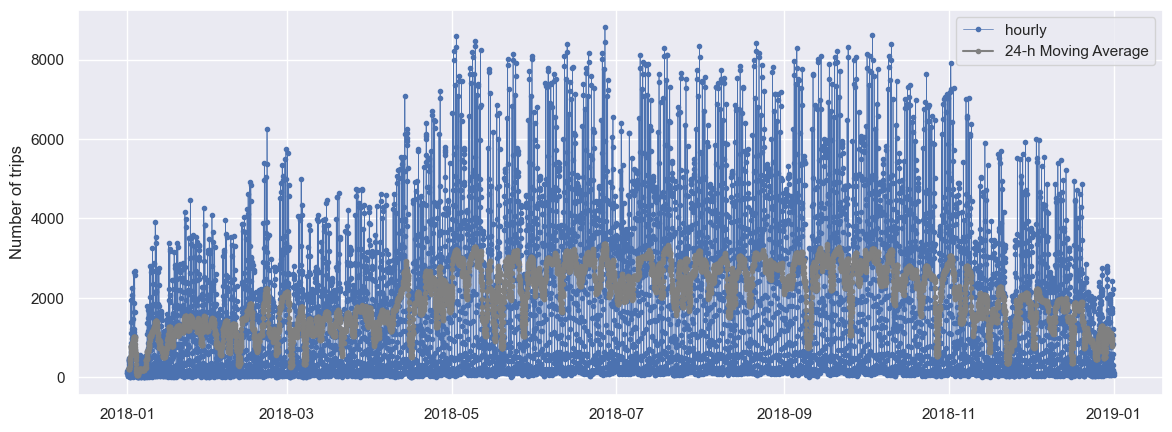

In [ ]:

opsd_24h = trips_per_hour_all[data_columns].rolling(24, center=True).mean()
start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc[start:end, 'num_trips'],
marker='.', linestyle='-', linewidth=0.5, label='hourly')
ax.plot(opsd_24h.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='24-h Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

# Autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

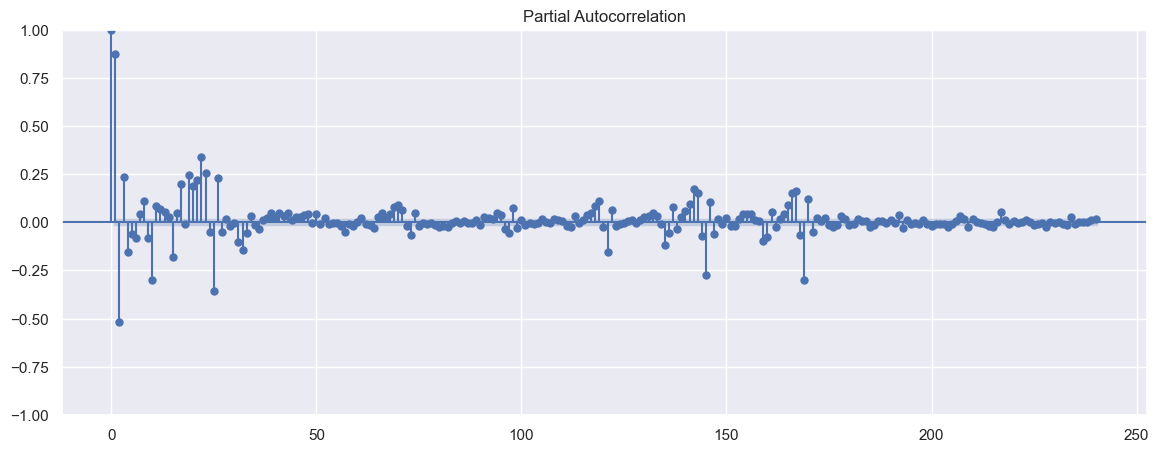

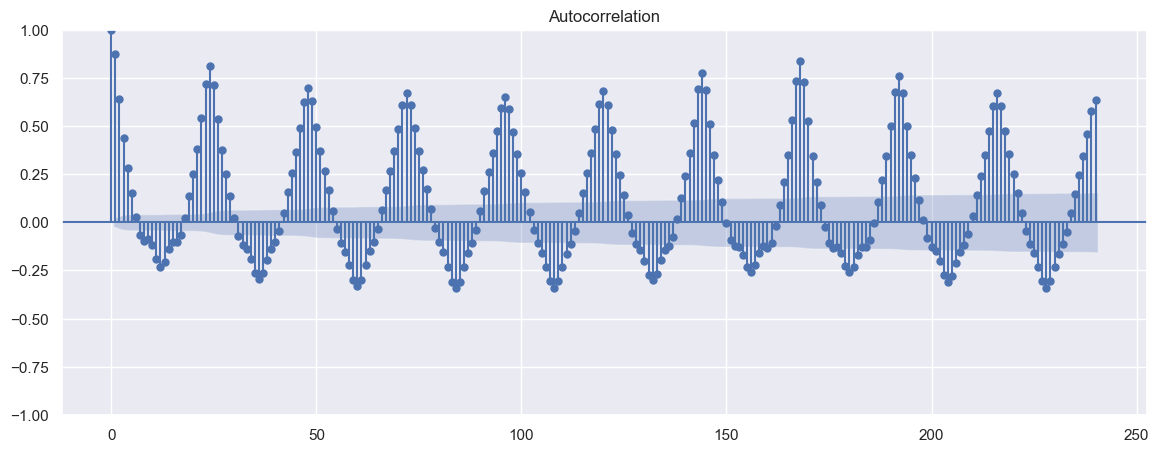

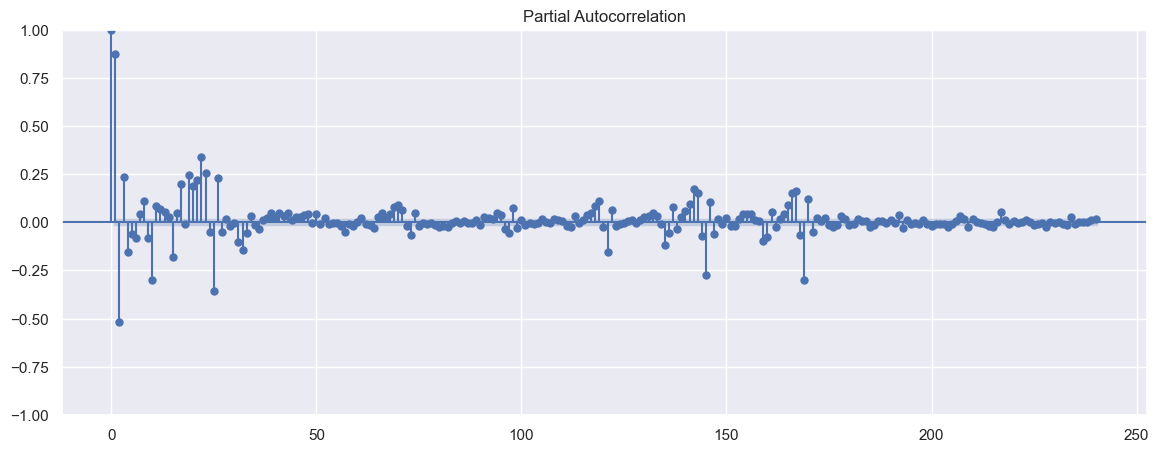

In [ ]:
plot_acf(trips_per_hour_all['num_trips'],lags=10*24) # lags valgt udfra 10 dage gnage 24 timer
plot_pacf(trips_per_hour_all['num_trips'],lags=10*24)

# Further investigation of what variables to keep for our prediction model

We discussed: leaving out starttime, stoptime, and longitude and latitude for both end station and startstation. The spatial because we now just care which cluster we are in, therefore also leave out the stations ID. Starttime is relevant stop time not su much because we try to predict demand. ANd the trip duration will be kept, also weekend, birth year, most common usertype, and most common gender. Bike ID have also been left out as it seems irrelevant to know which bike goes where at this point. 

In [ ]:


# Make sure starttime is a datetime
cluster_12['starttime'] = pd.to_datetime(cluster_12['starttime'])

# Extract date and hour
cluster_12['date'] = cluster_12['starttime'].dt.date
cluster_12['hour'] = cluster_12['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster_12.groupby(['date', 'hour'])
trips_per_hour.head()

tripduration               starttime                stoptime  \
560672              79 2018-01-11 10:12:58.979 2018-01-11 10:14:18.703   
560673             185 2018-01-11 10:15:48.486 2018-01-11 10:18:54.284   
560674             136 2018-01-11 10:21:20.566 2018-01-11 10:23:37.389   
560675             129 2018-01-11 10:24:03.587 2018-01-11 10:26:13.073   
560676             275 2018-01-11 10:26:55.663 2018-01-11 10:31:30.869   
...                ...                     ...                     ...   
17548052           567 2018-12-31 20:46:49.874 2018-12-31 20:56:16.957   
17548100          2119 2018-12-31 21:13:05.732 2018-12-31 21:48:25.147   
17548126           158 2018-12-31 21:28:09.056 2018-12-31 21:30:47.355   
17548159          1592 2018-12-31 21:50:45.543 2018-12-31 22:17:18.434   
17548259          3393 2018-12-31 22:50:49.613 2018-12-31 23:47:23.474   

          start_station_id  start_station_latitude  start_station_longitude  \
560672              3239.0               40.646538               -74.016588   
560673              3239.0               40.646538               -74.016588   
560674              3239.0               40.646538               -74.016588   
560675              3239.0               40.646538               -74.016588   
560676              3239.0               40.646538               -74.016588   
...                    ...                     ...                      ...   
17548052            3373.0               40.675070               -73.987752   
17548100            3404.0               40.670492               -73.985417   
17548126            3423.0               40.661063               -73.979453   
17548159            3368.0               40.672816               -73.983524   
17548259            3300.0               40.665147               -73.976376   

          end_station_id  end_station_latitude  end_station_longitude  bikeid  \
560672            3239.0             40.646538             -74.016588   22368   
560673            3239.0             40.646538             -74.016588   22368   
560674            3239.0             40.646538             -74.016588   22368   
560675            3239.0             40.646538             -74.016588   22368   
560676            3239.0             40.646538             -74.016588   22368   
...                  ...                   ...                    ...     ...   
17548052          3306.0             40.666208             -73.981999   21677   
17548100          3368.0             40.672816             -73.983524   27541   
17548126          3300.0             40.665147             -73.976376   17113   
17548159          3232.0             40.689622             -73.983043   35725   
17548259          3349.0             40.672968             -73.970880   17113   

            usertype  birth_year  gender  weekday  is_weekend  cluster  \
560672    Subscriber        1993       1        3       False       12   
560673    Subscriber        1993       1        3       False       12   
560674    Subscriber        1993       1        3       False       12   
560675    Subscriber        1993       1        3       False       12   
560676    Subscriber        1993       1        3       False       12   
...              ...         ...     ...      ...         ...      ...   
17548052  Subscriber        1988       1        0       False       12   
17548100  Subscriber        1970       1        0       False       12   
17548126  Subscriber        1979       2        0       False       12   
17548159  Subscriber        1970       1        0       False       12   
17548259  Subscriber        1985       1        0       False       12   

                date  hour  
560672    2018-01-11    10  
560673    2018-01-11    10  
560674    2018-01-11    10  
560675    2018-01-11    10  
560676    2018-01-11    10  
...              ...   ...  
17548052  2018-12-31    20  
17548100  2018-12-31    21  
17548126  2018-12-31    21  
17548159  2018-12-31

In [ ]:

cluster_12.index.name = 'trip_id'
cluster_12

tripduration               starttime                stoptime  \
trip_id                                                                  
560672              79 2018-01-11 10:12:58.979 2018-01-11 10:14:18.703   
560673             185 2018-01-11 10:15:48.486 2018-01-11 10:18:54.284   
560674             136 2018-01-11 10:21:20.566 2018-01-11 10:23:37.389   
560675             129 2018-01-11 10:24:03.587 2018-01-11 10:26:13.073   
560676             275 2018-01-11 10:26:55.663 2018-01-11 10:31:30.869   
...                ...                     ...                     ...   
17548052           567 2018-12-31 20:46:49.874 2018-12-31 20:56:16.957   
17548100          2119 2018-12-31 21:13:05.732 2018-12-31 21:48:25.147   
17548126           158 2018-12-31 21:28:09.056 2018-12-31 21:30:47.355   
17548159          1592 2018-12-31 21:50:45.543 2018-12-31 22:17:18.434   
17548259          3393 2018-12-31 22:50:49.613 2018-12-31 23:47:23.474   

          start_station_id  start_station_latitude  start_station_longitude  \
trip_id                                                                       
560672              3239.0               40.646538               -74.016588   
560673              3239.0               40.646538               -74.016588   
560674              3239.0               40.646538               -74.016588   
560675              3239.0               40.646538               -74.016588   
560676              3239.0               40.646538               -74.016588   
...                    ...                     ...                      ...   
17548052            3373.0               40.675070               -73.987752   
17548100            3404.0               40.670492               -73.985417   
17548126            3423.0               40.661063               -73.979453   
17548159            3368.0               40.672816               -73.983524   
17548259            3300.0               40.665147               -73.976376   

          end_station_id  end_station_latitude  end_station_longitude  bikeid  \
trip_id                                                                         
560672            3239.0             40.646538             -74.016588   22368   
560673            3239.0             40.646538             -74.016588   22368   
560674            3239.0             40.646538             -74.016588   22368   
560675            3239.0             40.646538             -74.016588   22368   
560676            3239.0             40.646538             -74.016588   22368   
...                  ...                   ...                    ...     ...   
17548052          3306.0             40.666208             -73.981999   21677   
17548100          3368.0             40.672816             -73.983524   27541   
17548126          3300.0             40.665147             -73.976376   17113   
17548159          3232.0             40.689622             -73.983043   35725   
17548259          3349.0             40.672968             -73.970880   17113   

            usertype  birth_year  gender  weekday  is_weekend  cluster  \
trip_id                                                                  
560672    Subscriber        1993       1        3       False       12   
560673    Subscriber        1993       1        3       False       12   
560674    Subscriber        1993       1        3       False       12   
560675    Subscriber        1993       1        3       False       12   
560676    Subscriber        1993       1        3       False       12   
...              ...         ...     ...      ...         ...      ...   
17548052  Subscriber        1988       1        0       False       12   
17548100  Subscriber        1970       1        0       False       12   
17548126  Subscriber        1979       2        0       False       12   
17548159  Subscriber        1970       1        0       False       12   
17548259  Subscriber        1985       1        0       False       12   

  

In [ ]:

grouped = (
    cluster_12.groupby(['date', 'hour'])
      .agg(
          trip_count=('tripduration', 'count'),
          is_weekend=('is_weekend', 'first'),
          most_common_user_type=('usertype', lambda x: x.value_counts().index[0]),
          most_common_gender=('gender', lambda x: x.value_counts().index[0]),
          duration_mean=('tripduration', 'mean'),
          birth_mean=('birth_year', 'mean')
      )
      .reset_index()
)


In [ ]:
grouped['datetime'] = pd.to_datetime(grouped['date'].astype(str)) + pd.to_timedelta(grouped['hour'], unit='h')
grouped.set_index('datetime', inplace=True)
grouped.drop(columns=['date'], inplace=True)
grouped.drop(columns=['hour'], inplace=True)



In [ ]:
grouped

trip_count  is_weekend most_common_user_type  \
datetime                                                            
2018-01-01 01:00:00           6       False            Subscriber   
2018-01-01 04:00:00           2       False            Subscriber   
2018-01-01 06:00:00           3       False            Subscriber   
2018-01-01 07:00:00           2       False            Subscriber   
2018-01-01 08:00:00           4       False            Subscriber   
...                         ...         ...                   ...   
2018-12-31 18:00:00           6       False            Subscriber   
2018-12-31 19:00:00           2       False            Subscriber   
2018-12-31 20:00:00           5       False            Subscriber   
2018-12-31 21:00:00           3       False            Subscriber   
2018-12-31 22:00:00           1       False            Subscriber   

                     most_common_gender  duration_mean   birth_mean  
datetime                                                             
2018-01-01 01:00:00                   1     400.166667  1977.333333  
2018-01-01 04:00:00                   1     522.000000  1972.500000  
2018-01-01 06:00:00                   1     233.666667  1975.666667  
2018-01-01 07:00:00                   1     324.000000  1973.000000  
2018-01-01 08:00:00                   1     911.000000  1981.250000  
...                                 ...            ...          ...  
2018-12-31 18:00:00                   1     682.333333  1982.000000  
2018-12-31 19:00:00                   2     357.500000  1986.000000  
2018-12-31 20:00:00                   1     403.000000  1988.400000  
2018-12-31 21:00:00                   1    1289.666667  1973.000000  
2018-12-31 22:00:00                   1    3393.000000  1985.000000  

[8112 rows x 6 columns]

# Starting to build model

## non stationarity - hjælp
Vi kan jo se nogle klare seasonalities - how to account for them

In [ ]:
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


## Naive model - predict same val for trip_count as 24 h before

In [ ]:
# Make sure the index is a DatetimeIndex
grouped.index = pd.to_datetime(grouped.index)

# Define the test start date
test_start = pd.Timestamp("2018-11-01")

# Create boolean masks
train_mask = grouped.index < test_start
test_mask  = grouped.index >= test_start


In [ ]:
def plain_moving_average(series, n):
    #write your code here
    return list([np.average(series.iloc[max(i-n,0):i-1]) for i in range(1,len(series)+1)])

def plotprediction(series, pred_series, labels=["original", "predicted"], x_axis=None, plot_intervals=False, scale=1.96, plot_anomalies=False, title="prediction"):

    plt.figure(figsize=(15,5))
    plt.title(title)
    if x_axis is None:
        x_axis=series.index
    
    plt.plot(x_axis, pred_series, "g", label=labels[1])
    plt.plot(x_axis, series, label=labels[0])
    

    # Plot confidence intervals for smoothed values

    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

In [ ]:
grouped['copy_pred'] = [0]*24 + grouped['trip_count'].to_list()[:-24]

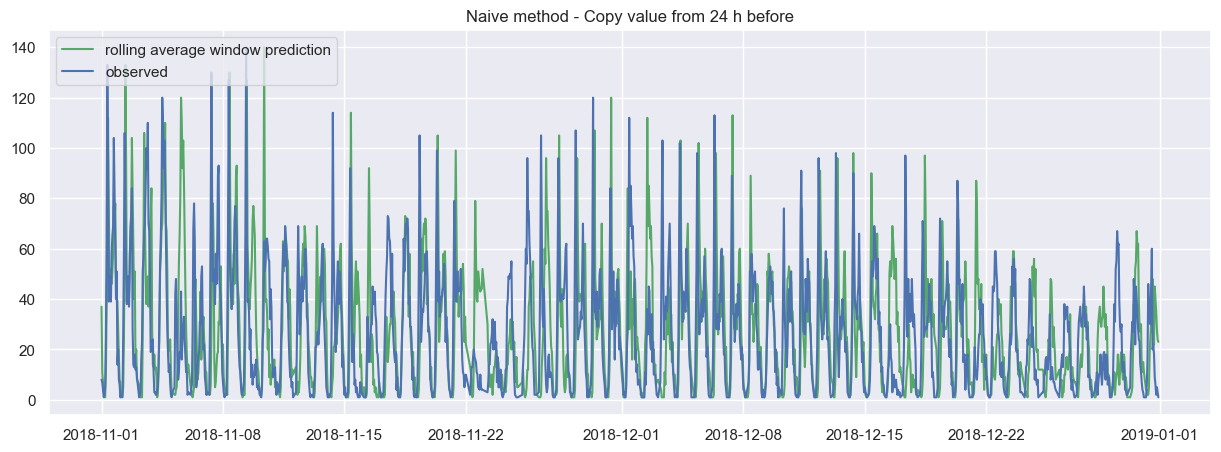

In [ ]:
plotprediction(grouped[test_mask]['trip_count'], grouped[test_mask]['copy_pred'], labels=['observed', 'rolling average window prediction'], title="Naive method - Copy value from 24 h before")

### Eval. of Naive model

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_stats(y_test, y_preds, title="You forgot the title!"):
    print(title+": ")
    print("\tr^2=%f"%r2_score(y_test,y_preds))
    print("\tMAE=%f"%mean_absolute_error(y_test,y_preds))
    print("\tMAPE=%f"%mean_absolute_percentage_error(y_test,y_preds))

In [ ]:
print_stats(grouped[test_mask]['trip_count'], grouped[test_mask]['copy_pred'], "copy method")

copy method: 
	r^2=-0.119707
	MAE=17.714180
	MAPE=139.680468


# Trying to do an ARIMA model
### Be aware that for this ARIMA model we only use trip_count as variable to predict - not weekend or any of the others

So QUESTIONS:
Can we get categorical (or event just more data) in the arima model?
How to choose parameters for p,q and d? 

Det kan være at ARIMA med tuning kan blive godt, men Lineær Regression kan muligvis opnå lignende resultater med mindre besvær. -(Konklusion fra kaggle-linket)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
grouped_data = pd.DataFrame(grouped.trip_count.copy())
grouped_data


trip_count
datetime                       
2018-01-01 01:00:00           6
2018-01-01 04:00:00           2
2018-01-01 06:00:00           3
2018-01-01 07:00:00           2
2018-01-01 08:00:00           4
...                         ...
2018-12-31 18:00:00           6
2018-12-31 19:00:00           2
2018-12-31 20:00:00           5
2018-12-31 21:00:00           3
2018-12-31 22:00:00           1

[8112 rows x 1 columns]

In [ ]:
data=grouped_data[train_mask]
model=ARIMA(data, order=(24, 0, 0))
AR=model.fit()
print(AR.summary())

c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             trip_count   No. Observations:                 6765
Model:                ARIMA(24, 0, 0)   Log Likelihood              -27938.414
Date:                Mon, 24 Nov 2025   AIC                          55928.829
Time:                        11:16:10   BIC                          56106.136
Sample:                             0   HQIC                         55990.031
                               - 6765                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9926      2.649     13.589      0.000      30.801      41.184
ar.L1          0.8712      0.009     95.777      0.000       0.853       0.889
ar.L2         -0.1843      0.014    -13.215      0.0

Kan man få Sarima til at tage højde for is_weekend? 
When testing the model - we can update one day at a time? So after we predicted for a day we add the actual values for that day and then try to predict the next one?

# ARIMA 2.0

In [ ]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

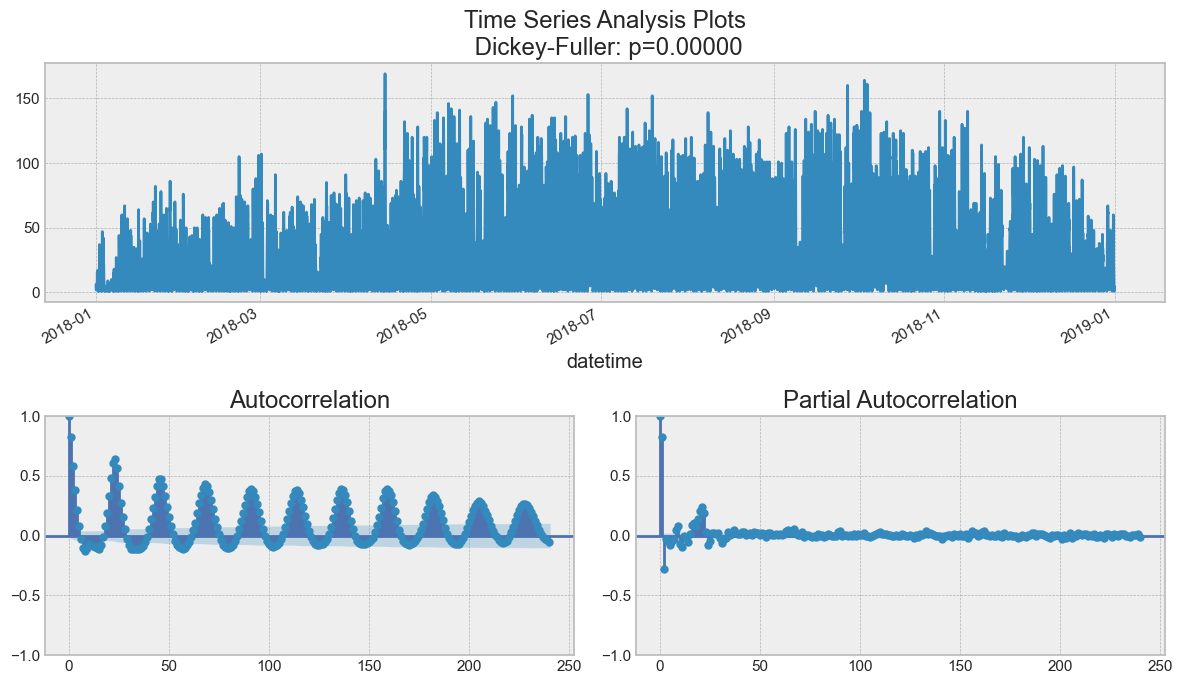

In [ ]:
tsplot(grouped_data.trip_count, lags=10*24)

# Adjusting for daily seasonality: 

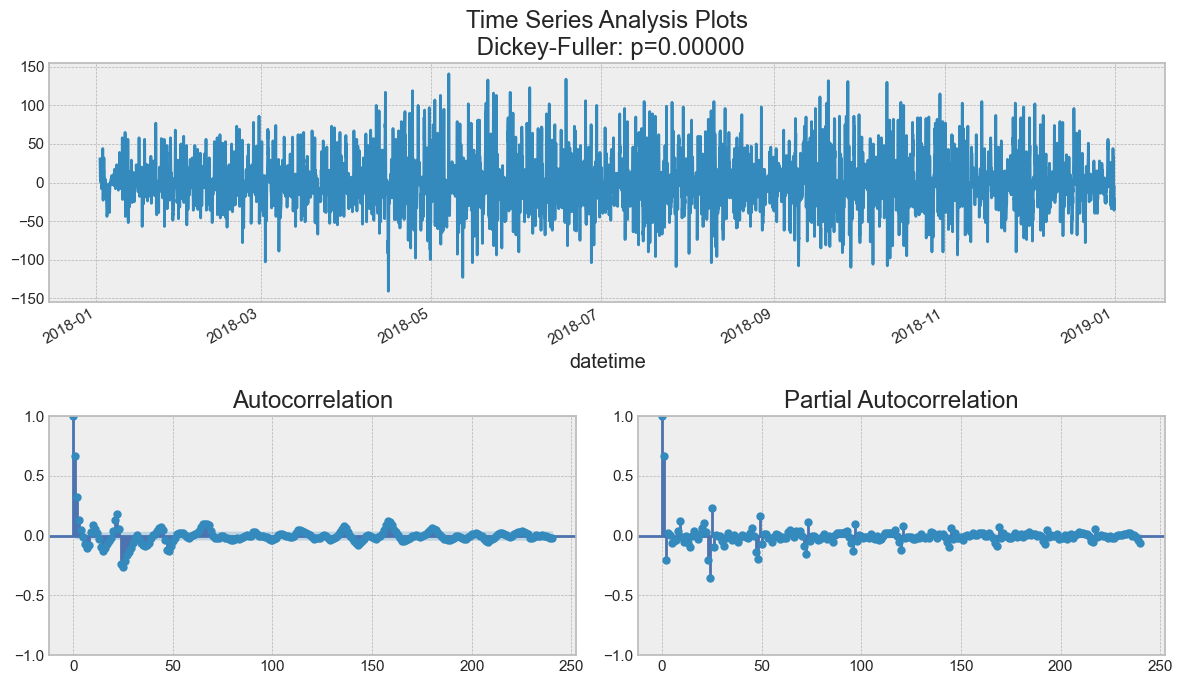

In [ ]:
trip_diff = grouped_data.trip_count - grouped_data.trip_count.shift(24)
tsplot(trip_diff[24:], lags=10*24)

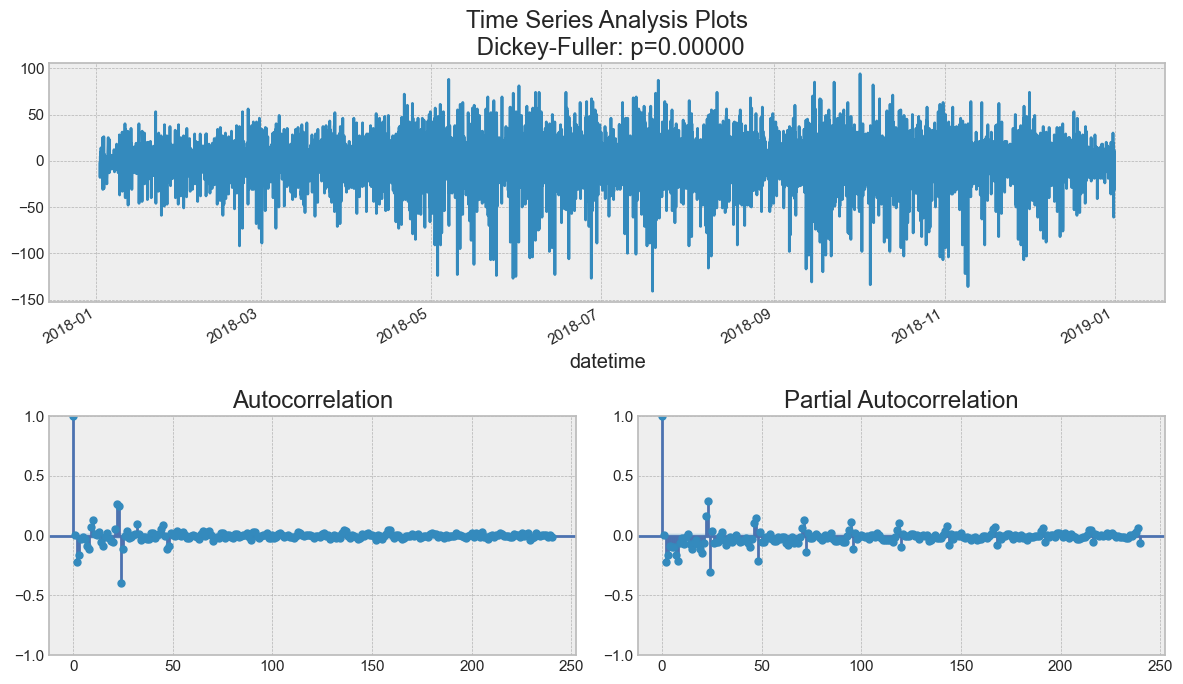

In [ ]:
trip_diff = trip_diff - trip_diff.shift(1)
tsplot(trip_diff[24+1:], lags=10*24)

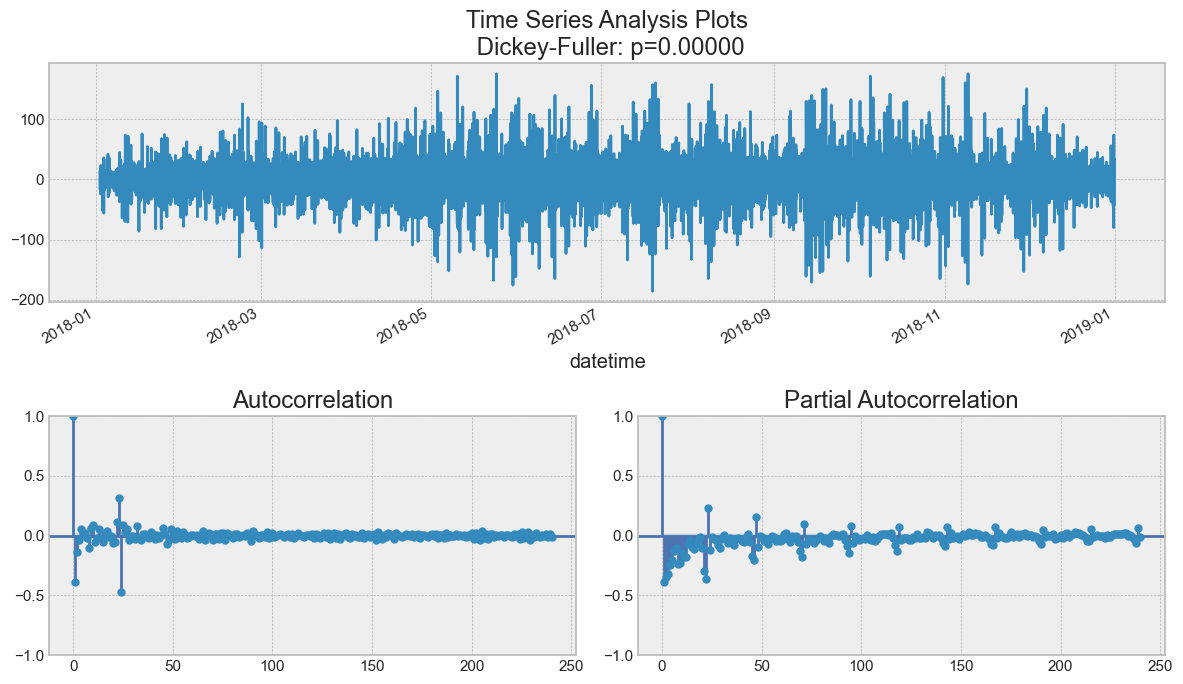

In [ ]:
trip_diff = trip_diff - trip_diff.shift(1)
trip_clean = trip_diff[25:].replace([np.inf, -np.inf], np.nan).dropna()
tsplot(trip_clean, lags=10*24)

In [ ]:
from itertools import product
ps = range(1, 6)
d=0 
qs = range(1, 6)
Ps = range(1, 7)
D=0 
Qs = range(1, 7)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

900

In [ ]:
from tqdm import tqdm_notebook
'''
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table
    ''' # Kode from Kaggle - does not use 

'\ndef optimizeSARIMA(parameters_list, d, D, s):\n    """\n        Return dataframe with parameters and corresponding AIC\n        \n        parameters_list - list with (p, q, P, Q) tuples\n        d - integration order in ARIMA model\n        D - seasonal integration order \n        s - length of season\n    """\n    \n    results = []\n    best_aic = float("inf")\n\n    for param in tqdm_notebook(parameters_list):\n        # we need try-except because on some combinations model fails to converge\n        try:\n            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), \n                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)\n        except:\n            continue\n        aic = model.aic\n        # saving best model, AIC and parameters\n        if aic < best_aic:\n            best_model = model\n            best_aic = aic\n            best_param = param\n        results.append([param, model.aic])\n\n    result_table

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd

# --- simple split ---
val_start = pd.Timestamp("2018-10-01")
test_start = pd.Timestamp("2018-11-01")

# Create boolean masks
train_mask = grouped.index < test_start
test_mask  = grouped.index >= test_start
val_mask = (grouped.index <= test_start)&(grouped.index>val_start)
train = grouped_data[train_mask]
val = grouped_data[val_mask]
test = grouped_data[test_mask]


results = []

for param in parameters_list:
    try:
        model = SARIMAX(
            train,
            order=(param[0], d, param[1]),
            seasonal_order=(param[2], D, param[3], s)
        ).fit(disp=False)
    except:
        continue

    # --- Training MSE ---
    train_pred = model.fittedvalues
    train_mse = np.mean((train - train_pred) ** 2)

    # --- Validation MSE ---
    val_forecast = model.forecast(steps=len(val))
    val_mse = np.mean((val - val_forecast) ** 2)

    results.append([param, train_mse, val_mse])

# --- Put results in a table ---
result_table = pd.DataFrame(results, columns=["parameters", "train_mse", "val_mse"])

# Sort by validation performance (lower is better)
result_table = result_table.sort_values(by='val_mse').reset_index(drop=True)

result_table


c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Bruger\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\Bruger\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa